In [2]:
# calculating the young's modulus of rocks  from geophysical well log data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
c = pd.read_excel('all data assigment2.xlsx')
c

,Depth (ft),Unnamed: 1,Density (g/cc),Unnamed: 3,Δt_compressional (μs/ft),Δt_shear (μs/ft),formation name,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,5000.0,NaN,2.4061,NaN,77.2805,114.8416,Marble Falls Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5000.5,NaN,2.3836,NaN,78.1448,114.1503,Marble Falls Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Formation name,Depth range (ft),Formation type,Estimate from E (from sonic and density logs),Estimate porosity (from density logs)
2,5001.0,NaN,2.2382,NaN,72.3262,104.8720,Marble Falls Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Marble Falls Formation,5000-5167,Limestone,Equation 22,Equation 26
3,5001.5,NaN,2.0972,NaN,69.1538,101.2285,Marble Falls Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Duffer Formation,5167-5514,Limestone,Equation 23,Equation 26
4,5002.0,NaN,2.5200,NaN,67.9961,104.3231,Marble Falls Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Barnett Formation,5514-6195,Shale,Equation 16,Equation 17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,6193.0,NaN,2.3314,NaN,47.5318,95.1687,Barnett Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2387,6193.5,NaN,2.6056,NaN,47.5318,95.1687,Barnett Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2388,6194.0,NaN,2.6056,NaN,47.5318,95.1687,Barnett Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2389,6194.5,NaN,2.6056,NaN,47.5318,95.1687,Barnett Formation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
c.columns

Index(['Depth (ft)', 'Unnamed: 1', 'Density (g/cc)', 'Unnamed: 3',
       'Δt_compressional (μs/ft)', 'Δt_shear (μs/ft)', 'formation name',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unname

In [5]:
#deleting unnecessary columns
c = c.drop(['Unnamed: 1','Unnamed: 1','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55',
       'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'Unnamed: 63',
       'Unnamed: 64', 'Unnamed: 65', 'Unnamed: 66', 'Unnamed: 67',
       'Unnamed: 68', 'Unnamed: 69','formation name'],axis = 1)

In [6]:
c = c.drop('Unnamed: 3',axis = 1)

In [7]:
c

,Depth (ft),Density (g/cc),Δt_compressional (μs/ft),Δt_shear (μs/ft)
0,5000.0,2.4061,77.2805,114.8416
1,5000.5,2.3836,78.1448,114.1503
2,5001.0,2.2382,72.3262,104.8720
3,5001.5,2.0972,69.1538,101.2285
4,5002.0,2.5200,67.9961,104.3231
...,...,...,...,...
2386,6193.0,2.3314,47.5318,95.1687
2387,6193.5,2.6056,47.5318,95.1687
2388,6194.0,2.6056,47.5318,95.1687
2389,6194.5,2.6056,47.5318,95.1687


In [8]:
#making the array of compressional and shear velocity
vp = np.array(c['Δt_compressional (μs/ft)'])
vs = np.array(c[ 'Δt_shear (μs/ft)'])


In [9]:
d = np.array(c['Density (g/cc)'])

#converting unit of speed in m/s
vp=np.array((1/vp)*1000000*0.305)
vs=np.array((1/vs)*1000000*0.305)



In [10]:
d

array([2.4061, 2.3836, 2.2382, ..., 2.6056, 2.6056, 2.6056])

In [11]:
#formula of modules of elasticity =(d*(vs**2))*(3*(vp**2)-4*(vs**2))/((vp**2)-(vs**2))*1000000
vs2 = vs**2
a = d*(vs2)*1000
b = (3*(vp**2)-4*(vs**2))
e = (((vp**2)-(vs**2))*1000000)

In [12]:
E = (a*b)/e

In [13]:
# u = UCS(ultimate comprasive strength)(MPa)
E

array([36868.311917  , 36041.85866893, 39621.94620888, ...,
       71391.66641325, 71391.66641325, 71391.66641325])

In [14]:
#making the array of depth

depth = np.array(c['Depth (ft)'])
depth

array([5000. , 5000.5, 5001. , ..., 6194. , 6194.5, 6195. ])

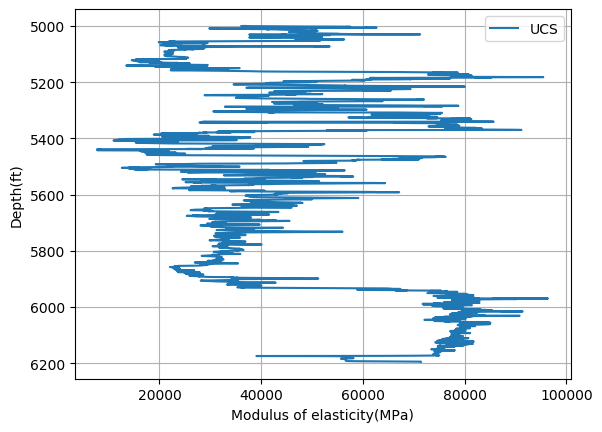

In [15]:
#for plotting the graph first calling the necessary arrguments
#plotting depth VS UCS
plt.style.use('default')
plt.plot(E,depth,label='UCS')
plt.gca().invert_yaxis()
plt.grid(True)
plt.xlabel('Modulus of elasticity(MPa)')
plt.ylabel('Depth(ft)')
plt.legend()

In [17]:
c.insert(4, "E(MPa)", E, True)

In [18]:
c

,Depth (ft),Density (g/cc),Δt_compressional (μs/ft),Δt_shear (μs/ft),E(MPa)
0,5000.0,2.4061,77.2805,114.8416,36868.311917
1,5000.5,2.3836,78.1448,114.1503,36041.858669
2,5001.0,2.2382,72.3262,104.8720,39621.946209
3,5001.5,2.0972,69.1538,101.2285,40455.505915
4,5002.0,2.5200,67.9961,104.3231,48709.997710
...,...,...,...,...,...
2386,6193.0,2.3314,47.5318,95.1687,63878.773056
2387,6193.5,2.6056,47.5318,95.1687,71391.666413
2388,6194.0,2.6056,47.5318,95.1687,71391.666413
2389,6194.5,2.6056,47.5318,95.1687,71391.666413
